In [7]:
# import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from joblib import dump, load

In [7]:
# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

In [14]:
# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='D:/prototype/data/train/clean',
    labels='inferred',
    label_mode='categorical',
    batch_size=100,
    image_size=(128, 128))

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory='D:/prototype/data/val',
    labels='inferred',
    label_mode='categorical',
    batch_size=100,
    image_size=(128, 128))

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory='D:/prototype/data/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=100,
    image_size=(128, 128))

Found 16000 files belonging to 10 classes.
Found 2000 files belonging to 10 classes.
Found 2000 files belonging to 10 classes.


In [20]:
# Get class names and number of classes
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']


In [7]:
# clean images model architecture
model0 = Sequential([
    keras.Input(shape=(128, 128, 3)),
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.GlobalAveragePooling2D(), 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
# Compile the model
model0.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [9]:
# Train the model
results0 = model0.fit(
    train_ds,
    epochs=10,
    batch_size=160,
    validation_data=val_ds
)

Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.1294 - loss: 2.2496 - val_accuracy: 0.2685 - val_loss: 2.1071
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 132s 821ms/step - accuracy: 0.1778 - loss: 2.1232 - val_accuracy: 0.2240 - val_loss: 2.0088
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 115s 715ms/step - accuracy: 0.1904 - loss: 2.0924 - val_accuracy: 0.2610 - val_loss: 2.0124
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 114s 712ms/step - accuracy: 0.1976 - loss: 2.0680 - val_accuracy: 0.2475 - val_loss: 1.9812
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 122s 760ms/step - accuracy: 0.2159 - loss: 2.0314 - val_accuracy: 0.2840 - val_loss: 1.9352
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 147s 917ms/step - accuracy: 0.2520 - loss: 1.9829 - val_accuracy: 0.2640 - val_loss: 1.8705
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 138s 859ms/step - accuracy: 0.2915 - loss: 1.9105 - val_accuracy: 0.2470 - val_loss: 1.8255
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 138s 861ms/step - accuracy: 0.3275 - lo

In [ ]:
#save baseline model results

dump(results0.history, 'model0_clean_images.pkl')

['model0_clean_images.pkl']

In [10]:
# test the model on clean test set
print("Evaluating model on test dataset:")
test_loss, test_acc = model0.evaluate(test_ds, verbose=2)

Evaluating model on test dataset:
20/20 - 15s - 751ms/step - accuracy: 0.2965 - loss: 1.9751


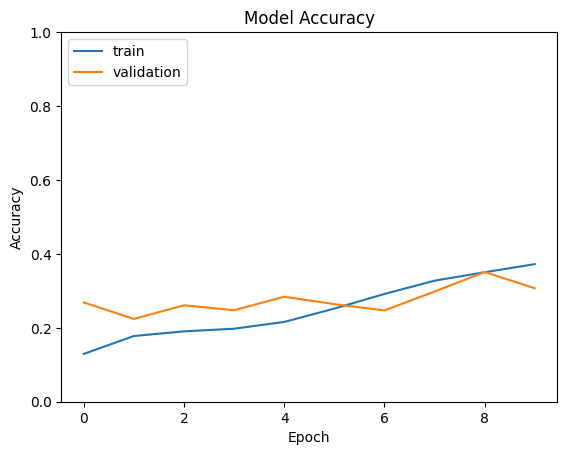

In [11]:
# Plot training & validation accuracy values
plt.plot(results0.history['accuracy'], label='accuracy')
plt.plot(results0.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

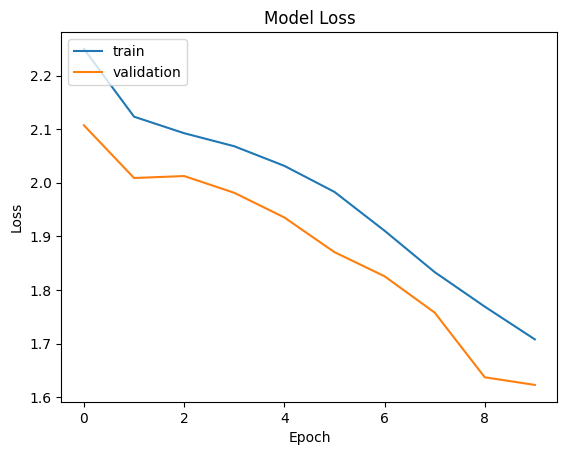

In [12]:
# Plot training & validation loss values
plt.plot(results0.history['loss'], label='loss')
plt.plot(results0.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0, 2])
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [34]:
# Save important training variables
baseline_model_variables = {
    'best_accuracy': max(results0.history['val_accuracy']),
    'average_accuracy': np.mean(results0.history['val_accuracy']),
    'final accuracy': results0.history['val_accuracy'][-1],
    'final_loss': results0.history['loss'][-1],
    'total_epochs': len(results0.history['loss']),
    'final_loss': results0.history['loss'][-1],
    'final_val_loss': results0.history['val_loss'][-1]
}

dump(baseline_model_variables, 'baseline_model_training_variables.pkl')

# Saving the baseline model
model0.save('baseline_model.keras')

print("Baseline training data saved successfully!")

Baseline training data saved successfully!


In [13]:
# Load degraded test datasets
degraded_test_ds_mild = tf.keras.utils.image_dataset_from_directory(
    directory='D:/prototype/degradation/test/mild',
    labels='inferred',
    label_mode='categorical',
    batch_size=50,
    image_size=(128, 128))

degraded_test_ds_moderate = tf.keras.utils.image_dataset_from_directory(
    directory='D:/prototype/degradation/test/moderate',
    labels='inferred',
    label_mode='categorical',
    batch_size=50,
    image_size=(128, 128))

degraded_test_ds_severe = tf.keras.utils.image_dataset_from_directory(
    directory='D:/prototype/degradation/test/severe',
    labels='inferred',
    label_mode='categorical',
    batch_size=50,
    image_size=(128, 128))




Found 2000 files belonging to 10 classes.
Found 2000 files belonging to 10 classes.
Found 2000 files belonging to 10 classes.


In [15]:
# evaluate on degraded test sets
print("Evaluating model on test degraded images set:")
test_loss, test_acc_degraded_mild = model0.evaluate(degraded_test_ds_mild, verbose=2)

Evaluating model on test degraded images set:
40/40 - 35s - 876ms/step - accuracy: 0.2615 - loss: 2.2376


In [16]:
print("Evaluating model on test degraded images set:")
test_loss, test_acc_degraded_moderate = model0.evaluate(degraded_test_ds_moderate, verbose=2)

Evaluating model on test degraded images set:
40/40 - 32s - 798ms/step - accuracy: 0.1690 - loss: 3.3566


In [17]:
print("Evaluating model on test degraded images set:")
test_loss, test_acc_degraded_severe = model0.evaluate(degraded_test_ds_severe, verbose=2)

Evaluating model on test degraded images set:
40/40 - 23s - 573ms/step - accuracy: 0.1620 - loss: 4.2585


In [18]:
model = Sequential([
    keras.Input(shape=(128, 128, 3)),
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.GlobalAveragePooling2D(), 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [19]:
# load degraded training datasets
train_ds_mild = tf.keras.utils.image_dataset_from_directory(
    directory='D:/prototype/degradation/train/mild',
    labels='inferred',
    label_mode='categorical',
    batch_size=100,
    image_size=(128, 128))

train_ds_moderate = tf.keras.utils.image_dataset_from_directory(
    directory='D:/prototype/degradation/train/moderate',
    labels='inferred',
    label_mode='categorical',
    batch_size=100,
    image_size=(128, 128))

train_ds_severe = tf.keras.utils.image_dataset_from_directory(
    directory='D:/prototype/degradation/train/severe',
    labels='inferred',
    label_mode='categorical',
    batch_size=100,
    image_size=(128, 128))

Found 16000 files belonging to 10 classes.
Found 16000 files belonging to 10 classes.
Found 16000 files belonging to 10 classes.


In [20]:
# load mixed degraded training dataset
train_ds_mixed = tf.keras.utils.image_dataset_from_directory(
    directory='D:/prototype/mixed_data/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=100,
    image_size=(128, 128))

Found 16000 files belonging to 10 classes.


In [21]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

results = model.fit(
    train_ds_mixed,
    epochs=10,
    batch_size=100,
    validation_data=val_ds
)

Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.1365 - loss: 2.2436 - val_accuracy: 0.2690 - val_loss: 2.1496
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 126s 785ms/step - accuracy: 0.1926 - loss: 2.0993 - val_accuracy: 0.3600 - val_loss: 2.0720
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 127s 791ms/step - accuracy: 0.2062 - loss: 2.0674 - val_accuracy: 0.2750 - val_loss: 2.0615
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 122s 760ms/step - accuracy: 0.2103 - loss: 2.0468 - val_accuracy: 0.2665 - val_loss: 2.0461
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 137s 858ms/step - accuracy: 0.2169 - loss: 2.0251 - val_accuracy: 0.1830 - val_loss: 2.0536
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 126s 781ms/step - accuracy: 0.2265 - loss: 2.0022 - val_accuracy: 0.2810 - val_loss: 2.0086
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 126s 789ms/step - accuracy: 0.2309 - loss: 1.9793 - val_accuracy: 0.2745 - val_loss: 2.0018
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 126s 788ms/step - accuracy: 0.2461 - lo

In [32]:
#save degraded model results
dump(results.history, 'model1_mixed_degraded_images.pkl')

['model1_mixed_degraded_images.pkl']

In [41]:
# test the mixed trained model on clean and degraded test sets
print("Evaluating model on test dataset:")
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print("Evaluating model on test degraded images set:")
test_loss, test_acc_degraded_mild = model.evaluate(degraded_test_ds_mild, verbose=2)
print("Evaluating model on test degraded images set:")
test_loss, test_acc_degraded_moderate = model.evaluate(degraded_test_ds_moderate, verbose=2)
print("Evaluating model on test degraded images set:")
test_loss, test_acc_degraded_severe = model.evaluate(degraded_test_ds_severe, verbose=2)

Evaluating model on test dataset:
20/20 - 10s - 492ms/step - accuracy: 0.1485 - loss: 3.3247
Evaluating model on test degraded images set:
40/40 - 13s - 330ms/step - accuracy: 0.1495 - loss: 3.0458
Evaluating model on test degraded images set:
40/40 - 11s - 276ms/step - accuracy: 0.1755 - loss: 3.2238
Evaluating model on test degraded images set:
40/40 - 11s - 278ms/step - accuracy: 0.1740 - loss: 3.3729


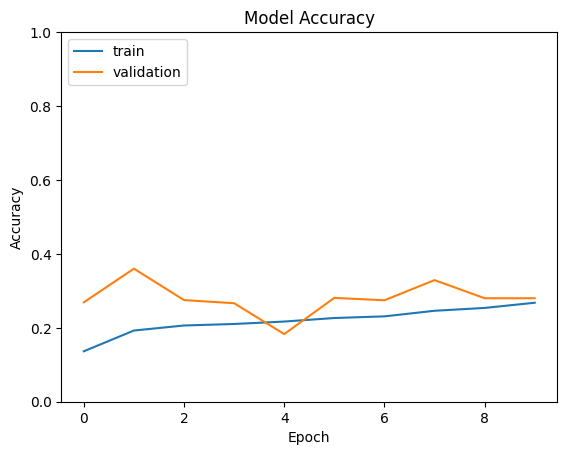

In [23]:
# Plot training & validation accuracy values for degraded model
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

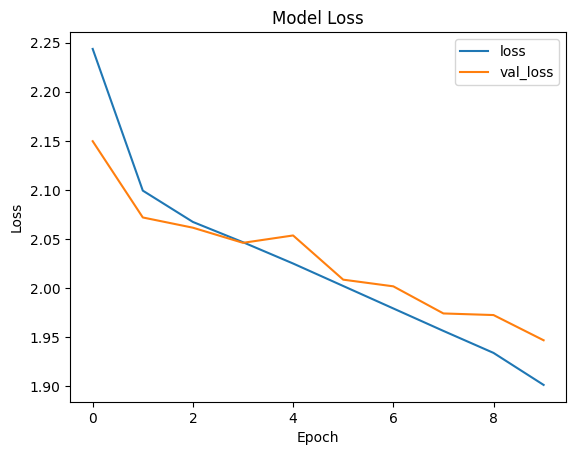

In [24]:
# Plot training & validation loss values for degraded model
plt.plot(results.history['loss'], label='loss')
plt.plot(results.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0, 3])
plt.legend()
plt.show()

In [46]:
#making predictions clean trained model using clean and degraded test sets
predictions_clean0 = model0.predict(test_ds)

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step


In [44]:
predictions_mild0 = model0.predict(degraded_test_ds_mild)

predictions_moderate0 = model0.predict(degraded_test_ds_moderate)

predictions_severe0 = model0.predict(degraded_test_ds_severe)

40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step


In [47]:
prediction_classes0 = np.argmax(predictions_clean0, axis=1)

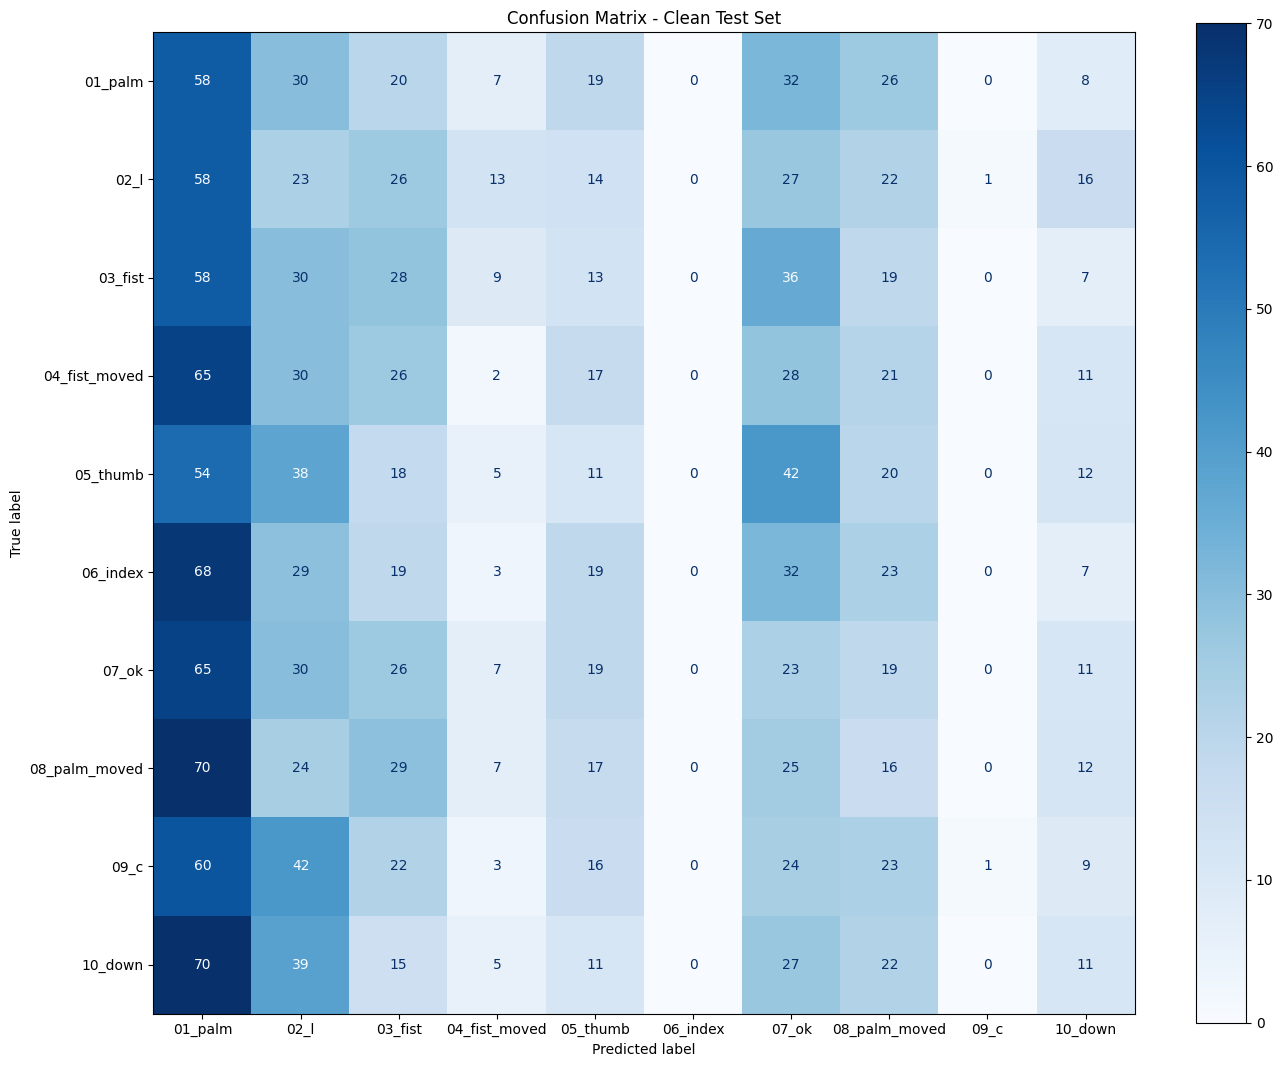

In [48]:
#plotting confusion matrix for clean test sets
fig1, ax1 = plt.subplots(figsize=(14, 12))
cm = confusion_matrix(np.concatenate([y for x, y in test_ds], axis=0).argmax(axis=1), prediction_classes0)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, ax=ax1)
plt.tight_layout()
plt.title('Confusion Matrix - Clean Test Set')
plt.subplots_adjust(bottom=0.15)
plt.show()

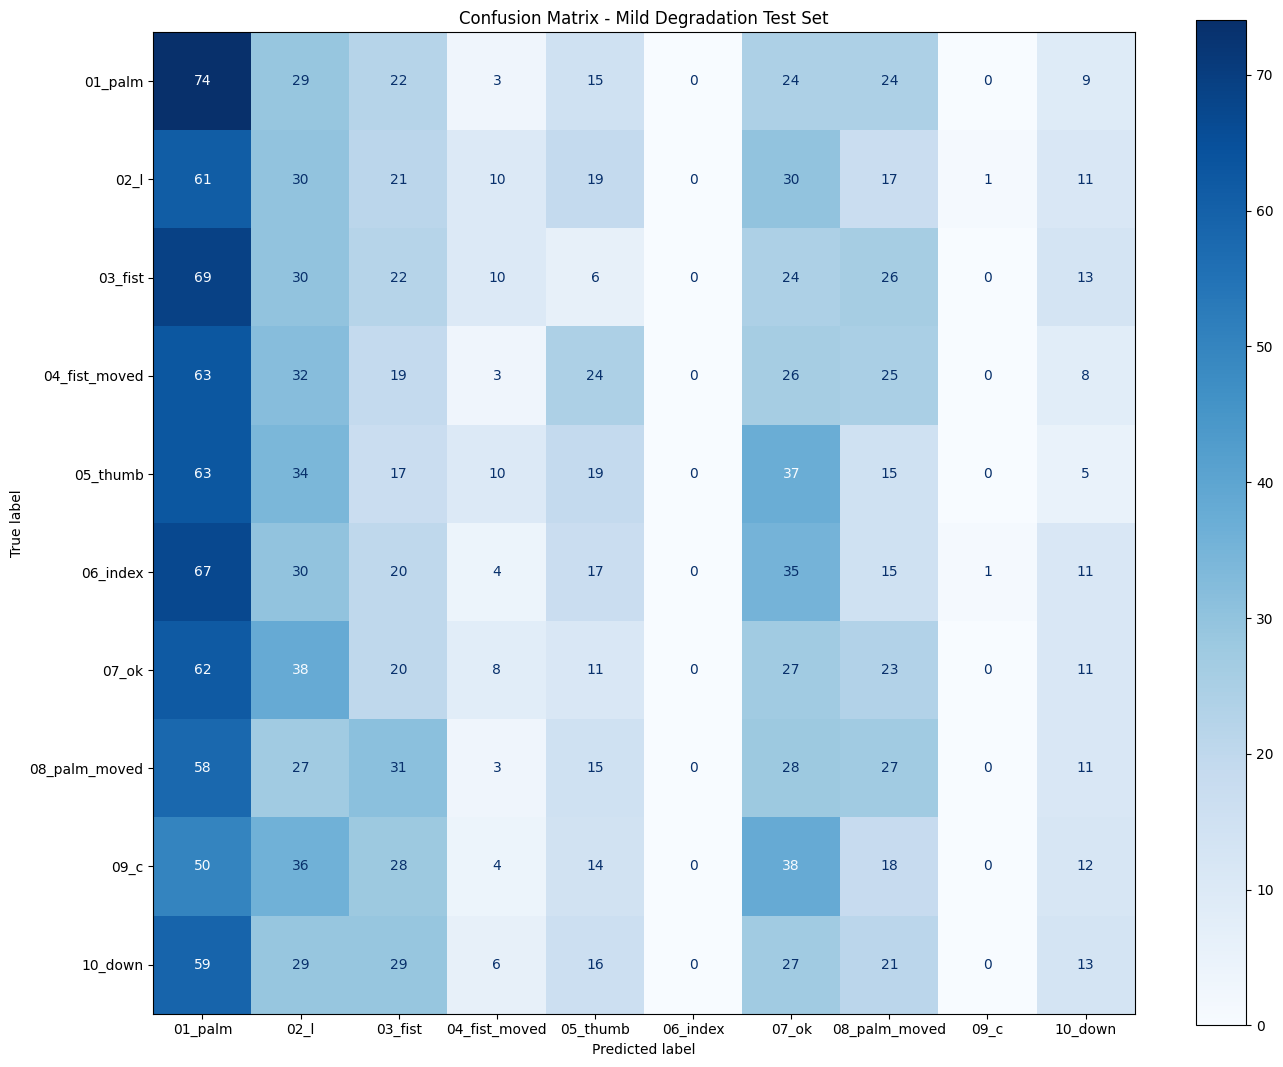

In [52]:
#plotting confusion matrix for mild degradation test set
fig2, ax2 = plt.subplots(figsize=(14, 12))
prediction_classes_mild0 = np.argmax(predictions_clean0, axis=1)
cm_mild = confusion_matrix(np.concatenate([y for x, y in degraded_test_ds_mild], axis=0).argmax(axis=1), prediction_classes_mild0)
disp_mild = ConfusionMatrixDisplay(confusion_matrix=cm_mild, display_labels=class_names)
disp_mild.plot(cmap=plt.cm.Blues, ax=ax2)
plt.tight_layout()
plt.title('Confusion Matrix - Mild Degradation Test Set')
plt.subplots_adjust(bottom=0.15)
plt.show()

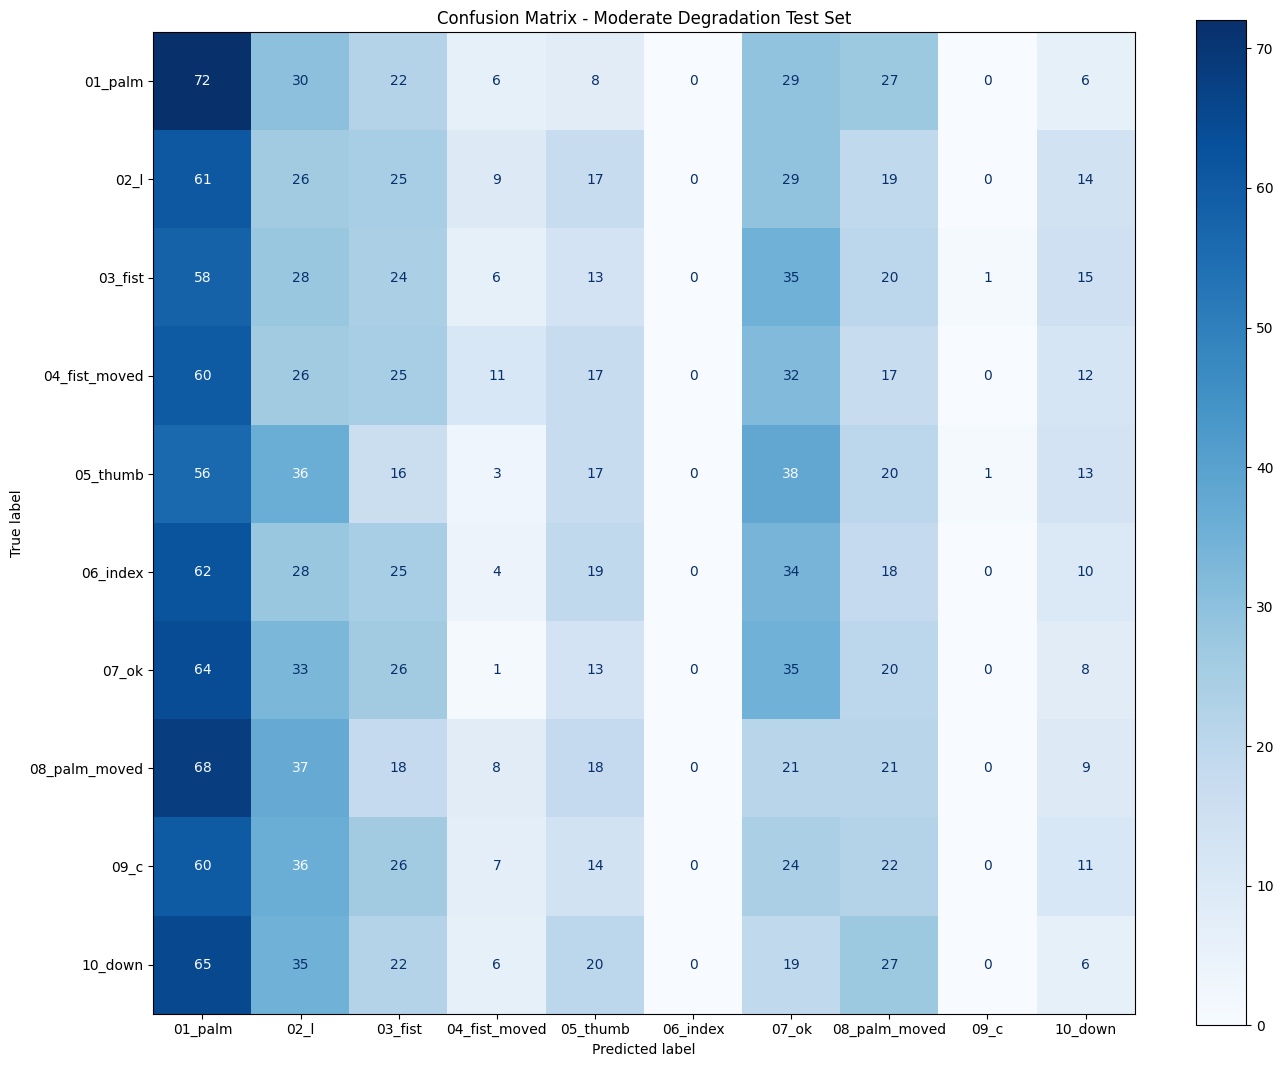

In [ ]:
#plotting confusion matrix for moderate degradation test set
fig3, ax3 = plt.subplots(figsize=(14, 12))
prediction_classes_moderate0 = np.argmax(predictions_clean0, axis=1)
cm_moderate = confusion_matrix(np.concatenate([y for x, y in degraded_test_ds_moderate], axis=0).argmax(axis=1), prediction_classes_moderate0)
disp_moderate = ConfusionMatrixDisplay(confusion_matrix=cm_moderate, display_labels=class_names)
disp_moderate.plot(cmap=plt.cm.Blues, ax=ax3)
plt.tight_layout()
plt.title('Confusion Matrix - Moderate Degradation Test Set')
plt.subplots_adjust(bottom=0.15)
plt.show()

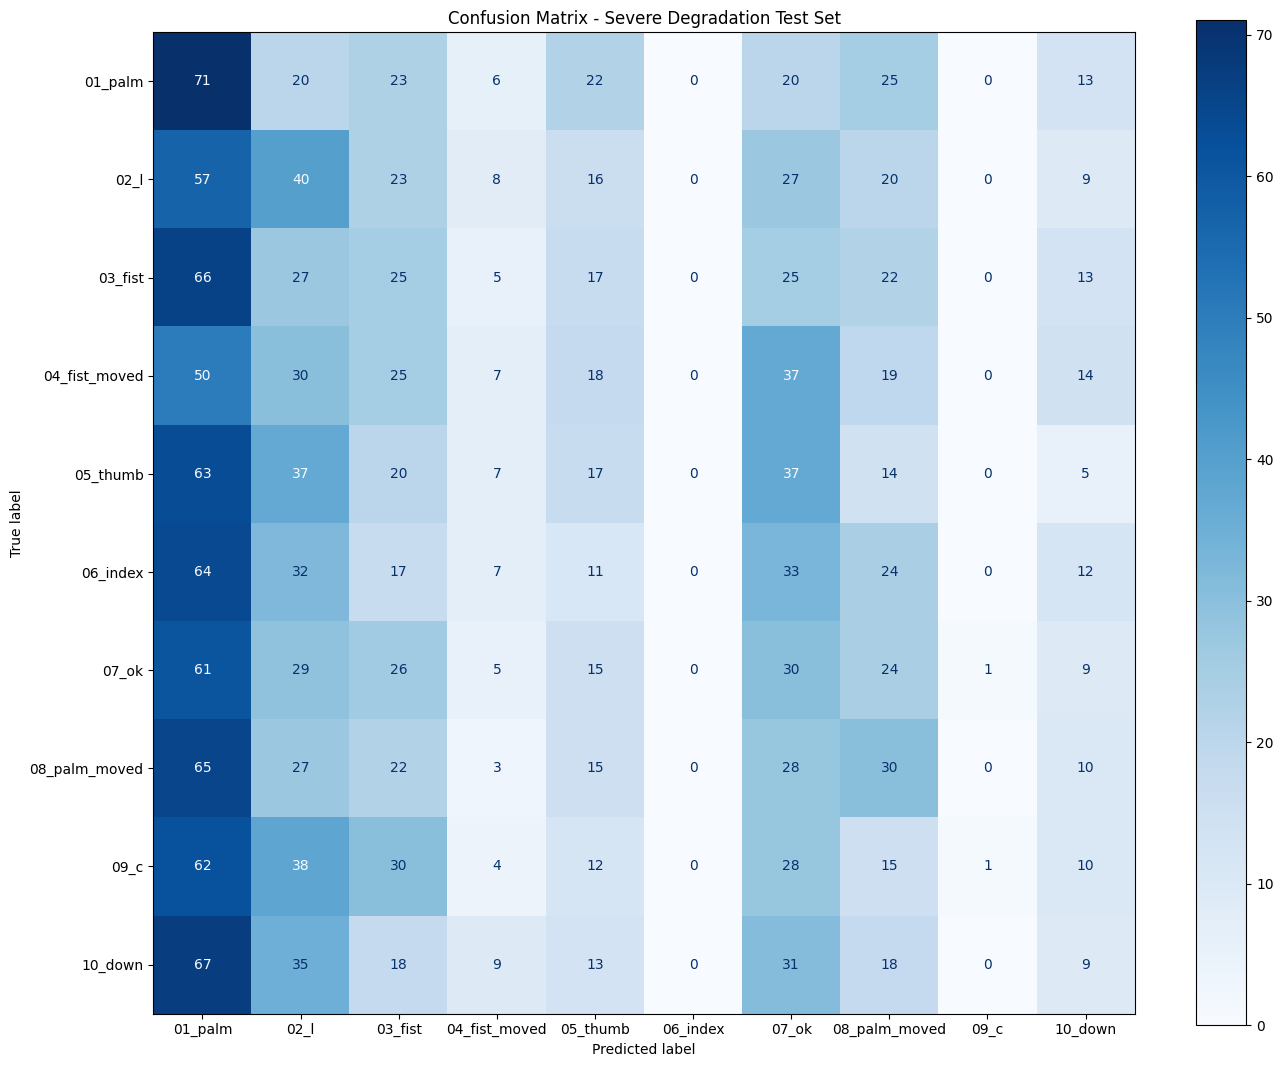

In [53]:
#plotting confusion matrix for severe degradation test set
fig4, ax4 = plt.subplots(figsize=(14, 12))
prediction_classes_severe = np.argmax(predictions_clean0, axis=1)
cm_severe = confusion_matrix(np.concatenate([y for x, y in degraded_test_ds_severe], axis=0).argmax(axis=1), prediction_classes_severe)
disp_severe = ConfusionMatrixDisplay(confusion_matrix=cm_severe, display_labels=class_names)
disp_severe.plot(cmap=plt.cm.Blues, ax=ax4)
plt.tight_layout()
plt.title('Confusion Matrix - Severe Degradation Test Set')
plt.subplots_adjust(bottom=0.15)
plt.show()

In [54]:
predictions_clean = model.predict(test_ds)

predictions_mild = model.predict(degraded_test_ds_mild)

predictions_moderate = model.predict(degraded_test_ds_moderate)

predictions_severe = model.predict(degraded_test_ds_severe)

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step


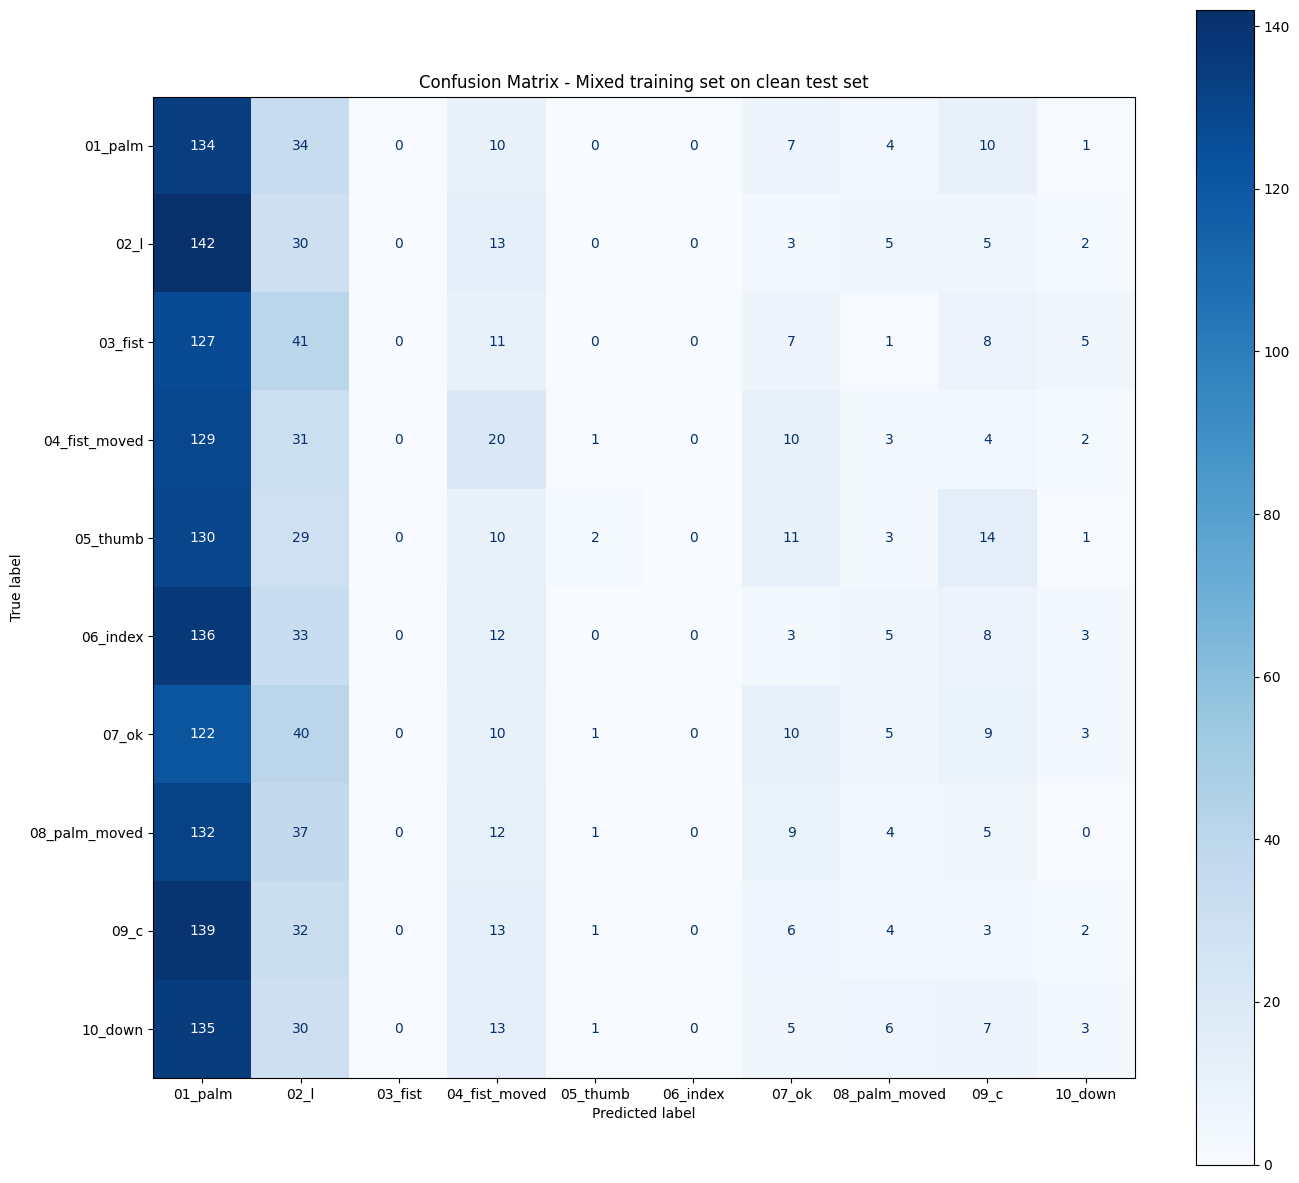

In [55]:
fig5, ax5 = plt.subplots(figsize=(14, 12))
prediction_classes = np.argmax(predictions_clean, axis=1)
cm = confusion_matrix(np.concatenate([y for x, y in test_ds], axis=0).argmax(axis=1), prediction_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, ax=ax5)
plt.tight_layout()
plt.title('Confusion Matrix - Mixed training set on clean test set')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix - Mixed training set on mild degraded test set')

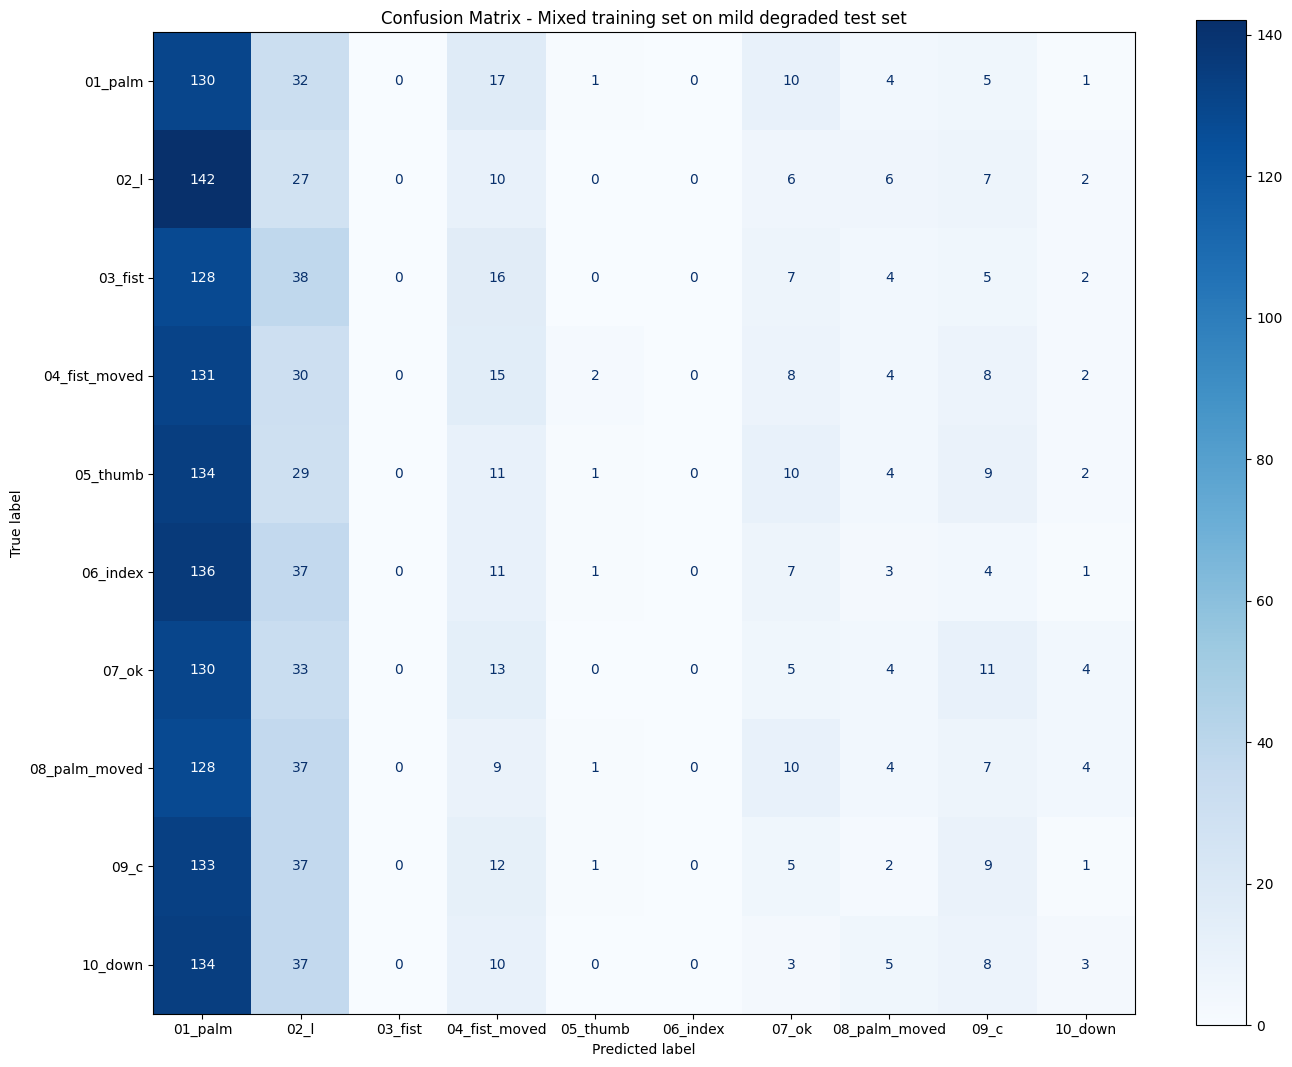

In [63]:
fig6, ax6 = plt.subplots(figsize=(14, 12))
prediction_classes_mild = np.argmax(predictions_clean, axis=1)
cm_mild = confusion_matrix(np.concatenate([y for x, y in degraded_test_ds_mild], axis=0).argmax(axis=1), prediction_classes_mild)
disp_mild = ConfusionMatrixDisplay(confusion_matrix=cm_mild, display_labels=class_names)
disp_mild.plot(cmap=plt.cm.Blues, ax=ax6)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.title('Confusion Matrix - Mixed training set on mild degraded test set')

Text(0.5, 1.0, 'Confusion Matrix - Mixed training set on moderate degraded test set')

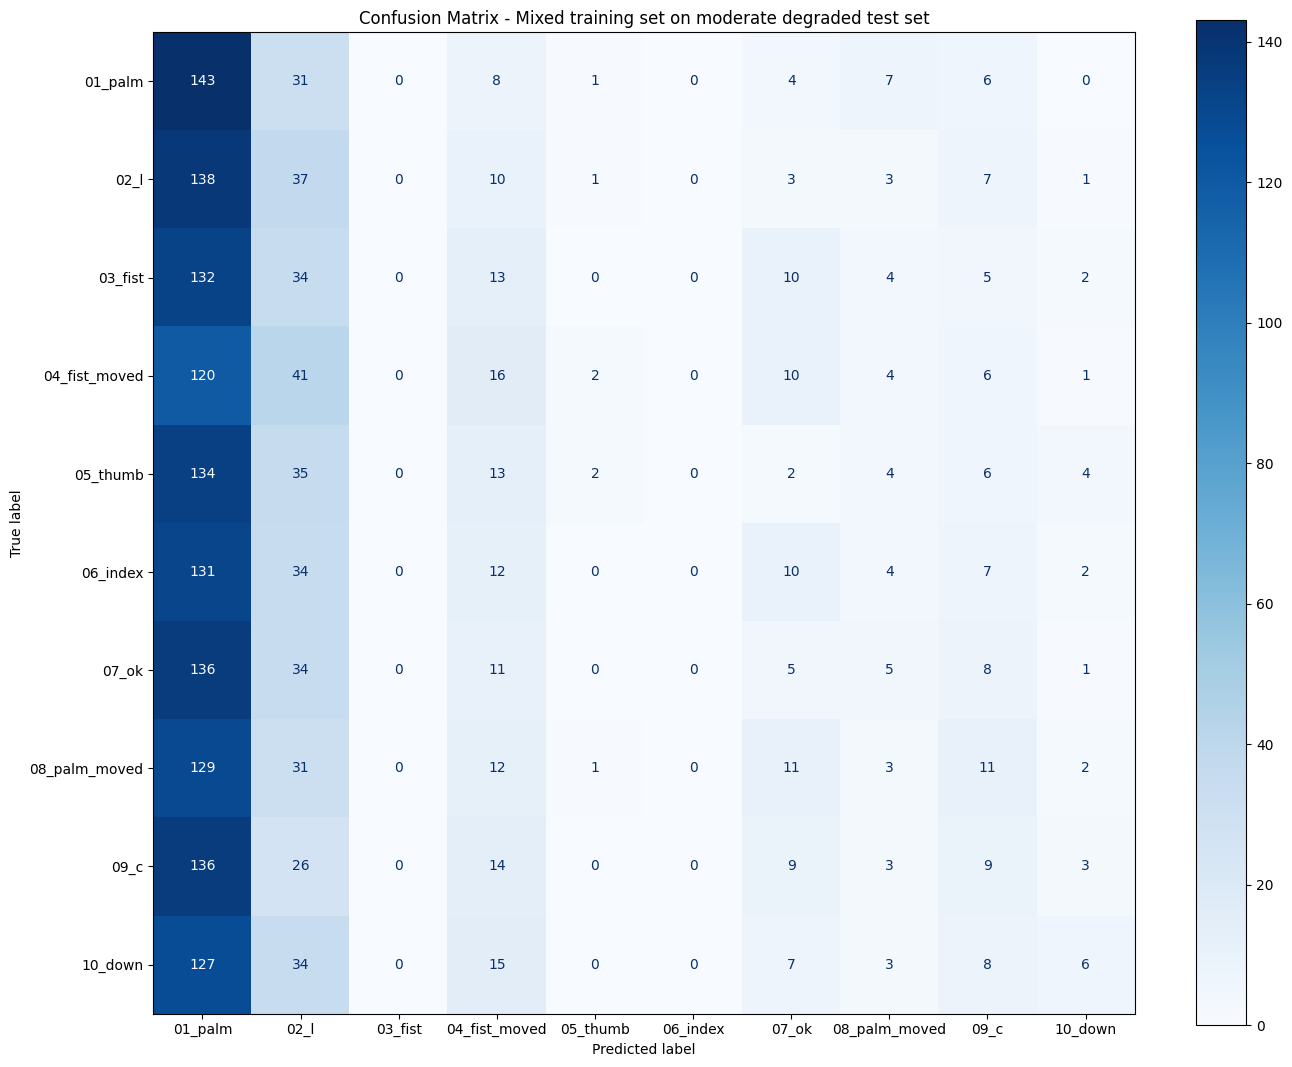

In [59]:
fig7, ax7 = plt.subplots(figsize=(14, 12))
prediction_classes_moderate = np.argmax(predictions_clean, axis=1)
cm_moderate = confusion_matrix(np.concatenate([y for x, y in degraded_test_ds_moderate], axis=0).argmax(axis=1), prediction_classes_moderate)
disp_moderate = ConfusionMatrixDisplay(confusion_matrix=cm_moderate, display_labels=class_names)
disp_moderate.plot(cmap=plt.cm.Blues, ax=ax7)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.title('Confusion Matrix - Mixed training set on moderate degraded test set')

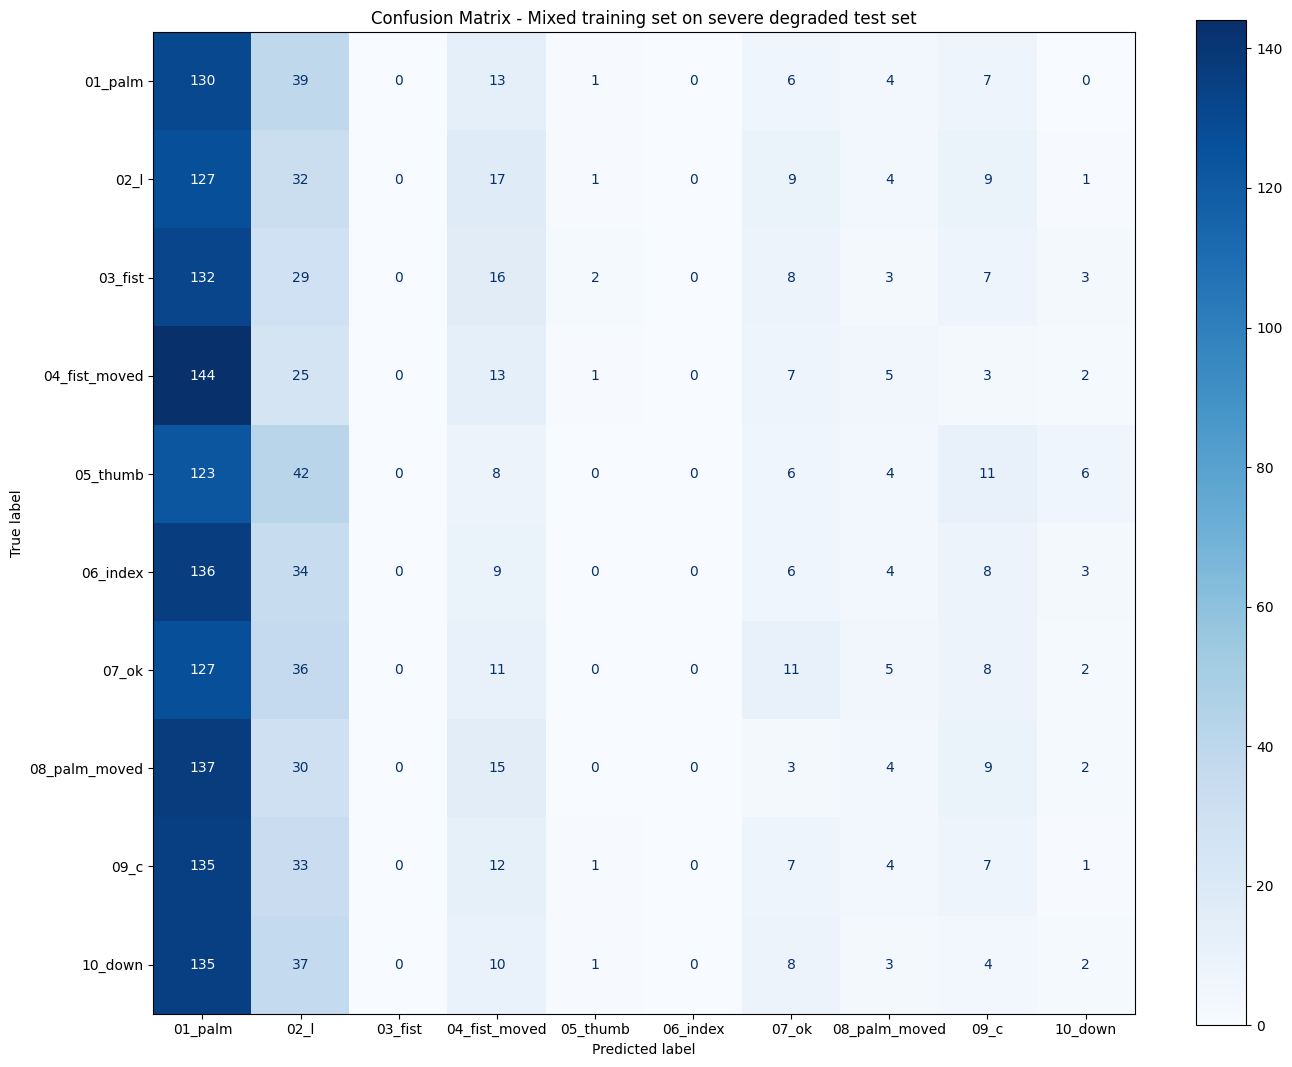

In [61]:
fig8, ax8 = plt.subplots(figsize=(14, 12))
prediction_classes_severe = np.argmax(predictions_clean, axis=1)
cm_severe = confusion_matrix(np.concatenate([y for x, y in degraded_test_ds_severe], axis=0).argmax(axis=1), prediction_classes_severe)
disp_severe = ConfusionMatrixDisplay(confusion_matrix=cm_severe, display_labels=class_names)
disp_severe.plot(cmap=plt.cm.Blues, ax=ax8)
plt.tight_layout()
plt.title('Confusion Matrix - Mixed training set on severe degraded test set')
plt.subplots_adjust(bottom=0.15)
plt.show()

In [42]:
# Show all confusion matrices
plt.show()

In [33]:
# Save important training variables
degraded_mix_model_variables = {
    'best_accuracy': max(results.history['val_accuracy']),
    'average_accuracy': np.mean(results.history['val_accuracy']),
    'final accuracy': results.history['val_accuracy'][-1],
    'final_loss': results.history['loss'][-1],
    'total_epochs': len(results.history['loss']),
    'final_loss': results.history['loss'][-1],
    'final_val_loss': results.history['val_loss'][-1]
}

dump(degraded_mix_model_variables, 'degraded_mix_model_training_variables.pkl')

# Saving the degraded mix model
model.save('degraded_mix_model.keras')

print("Degraded mix model training data saved successfully!")

Degraded mix model training data saved successfully!


In [11]:
#loading models for future use
model0 = load_model('D:\prototype\models\\baseline_model.keras')
model = load_model('D:\prototype\models\\degraded_mix_model.keras')

#loading training histories
model0_history = load('D:\prototype\models\model0_clean_images.pkl')
model_history = load('D:\prototype\models\model1_mixed_degraded_images.pkl')

d:\prototype\venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [10]:
#loading variables
baseline_model_variables = load('baseline_model_training_variables.pkl')
degraded_mix_model_variables = load('degraded_mix_model_training_variables.pkl')